In [1]:
## In this notebook I will be doing some basic Linear regression STUFF

In [2]:
from keras.datasets import boston_housing
(train_data, train_targets) , (test_data, test_targets) = boston_housing.load_data()

In [3]:
train_data.shape

(404, 13)

In [4]:
test_data.shape

(102, 13)

In [5]:
import numpy as np


In [6]:
mean = train_data.mean(axis=0) # calculating mean and standard deviation for normalization of data
std = train_data.std(axis=0)
train_data -= mean
train_data /= std
#now train data is normalized

test_data -=mean
test_data /= std
# we didnt uses test_data mean and std because we make sure there will be no exposure to test data to model while training


In [7]:
from keras import models
from keras import layers


def build_model():
    model = models.Sequential()

    model.add(layers.Dense(64,activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64,activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
    return model

In [8]:
k = 4
num_values = len(train_data)//k
num_epochs = 100
all_scores = []

In [9]:
for i in range(k):
    print(f"processing fold {i}")
    val_data = train_data[i*num_values:(i+1)*num_values]
    val_target = train_targets[i*num_values:(i+1)*num_values]

    partial_train_data = np.concatenate([train_data[:i*num_values],train_data[(i+1)*num_values:]] ,axis=0)
    partial_train_target = np.concatenate([train_targets[:i*num_values],train_targets[(i+1)*num_values:]], axis=0)

    model  = build_model()

    model.fit(partial_train_data,partial_train_target , epochs=num_epochs, batch_size=1 , verbose=0 )
    val_mse, val_mae = model.evaluate(val_data,val_target,verbose=0 )
    all_scores.append(val_mae)

processing fold 0
processing fold 1
processing fold 2
processing fold 3


In [10]:
print(all_scores)

[1.9427675008773804, 3.0454134941101074, 2.340824604034424, 2.4513344764709473]


In [13]:
num_epochs = 500
all_mae_history = []
for i in range(k):
    print(f"processing fold {i}")
    val_data = train_data[i*num_values:(i+1)*num_values]
    val_target = train_targets[i*num_values:(i+1)*num_values]

    partial_train_data = np.concatenate([train_data[:i*num_values],train_data[(i+1)*num_values:]] ,axis=0)
    partial_train_target = np.concatenate([train_targets[:i*num_values],train_targets[(i+1)*num_values:]], axis=0)

    model  = build_model()


    history = model.fit(partial_train_data,partial_train_target,validation_data=(val_data,val_target) , epochs=num_epochs, batch_size=1 , verbose=0 )
    print(history.history)
    mae_history = history.history['val_mae']
    all_mae_history.append(mae_history)


processing fold 0
{'loss': [199.76495361328125, 30.146726608276367, 22.005962371826172, 19.301544189453125, 16.67193031311035, 15.208255767822266, 13.710774421691895, 13.513786315917969, 12.352437019348145, 12.561760902404785, 11.399779319763184, 12.026089668273926, 10.633126258850098, 9.91845703125, 10.352272033691406, 10.237430572509766, 9.72690200805664, 8.706210136413574, 9.280360221862793, 9.461877822875977, 8.907270431518555, 8.9669771194458, 8.99634838104248, 8.760594367980957, 8.66648006439209, 8.387788772583008, 8.72019100189209, 8.491582870483398, 7.926332950592041, 8.484444618225098, 8.230545997619629, 8.051958084106445, 7.963253021240234, 7.497172832489014, 7.63267707824707, 7.882076740264893, 7.726948261260986, 7.630943775177002, 7.028488636016846, 7.210416793823242, 6.97780179977417, 6.719028949737549, 6.626938819885254, 7.21012544631958, 6.994541168212891, 6.825816631317139, 6.655388832092285, 6.2823896408081055, 6.363988876342773, 6.033074378967285, 6.484765529632568, 6

In [15]:
average_mae_history = [np.mean([x[i] for x in all_mae_history]) for i in range(num_epochs)]

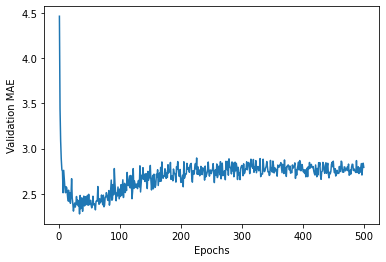

In [16]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history)+1),average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [17]:
# we need to remove first 10 points

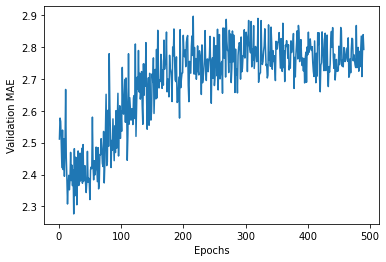

In [23]:
plt.plot(range(1, len(average_mae_history)-9),average_mae_history[10:])
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [24]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

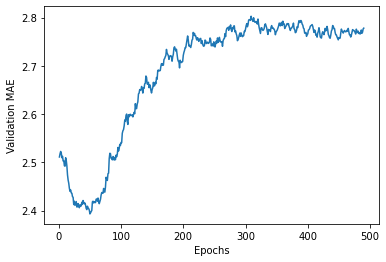

In [25]:
smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [26]:
model = build_model()
model.fit(train_data, train_targets,
epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 750us/step - loss: 20.6661 - mae: 2.9731
